In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("zomato.csv")

#### 1)shape of the dataset

In [4]:
df.shape

(51717, 17)

#### 2):- information about the dataset


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#### 3);- check for the missing values


In [6]:
df.isnull().sum().sort_values(ascending= False)

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

#### 4):- percentage of the missing values in every columns

In [7]:
column =[]
missing_percent = []
for i in df.columns:
    val =round((df[i].isnull().sum()/df.shape[0])*100,2)
    column.append(i),missing_percent.append(val)
data = {"column":column,
       "missing_percent":missing_percent}
df_missing = pd.DataFrame(data)

#### we don't have the column which has missing percent more than 70

#### 5):- datatypes of the columns

In [8]:
categorical_feature = [i for i in df.columns if df[i].dtypes=="O"]
numerical_feature = [i for i in df.columns if df[i].dtypes!="O"]

In [9]:
print(f'we have the {len(categorical_feature)} categorical feature')
print(f'we have the {len(numerical_feature)} numerical feature')

we have the 16 categorical feature
we have the 1 numerical feature


### Analysis of the categorical feature

#### a):- hotel accepting the online booking

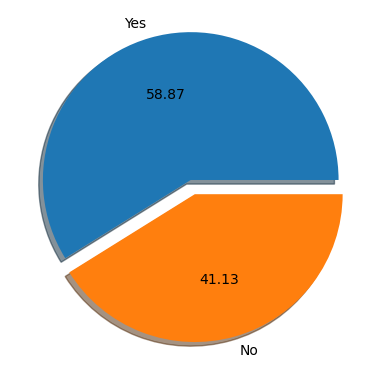

In [10]:
y = df["online_order"].value_counts().head(10)
mylabels =df["online_order"].value_counts().head(10).index

plt.pie(y,labels=mylabels,shadow = True,autopct='%.2f',explode =[0.1,0])
# plt.legend(mylabels,loc='upper right')
plt.show() 

#### 58.8% hotel have online booking system

### B):- address which got the maximum orders

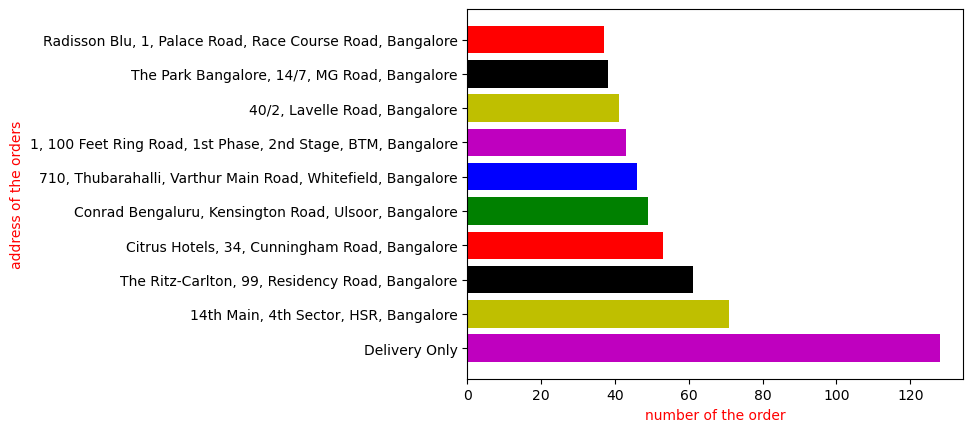

In [11]:
import matplotlib.pyplot as plt
y= df["address"].value_counts().head(10).index
x = df["address"].value_counts().head(10)
plt.barh(y, x,color=["m","y","k","r","g","b"])
plt.ylabel("address of the orders",color='r')
plt.xlabel("number of the order",color = "r")
plt.show()

#### delivers only ,got max order then 14th main 4 sector and then ritz carlton

### C):- hotel providing table booking services

<AxesSubplot:xlabel='book_table', ylabel='count'>

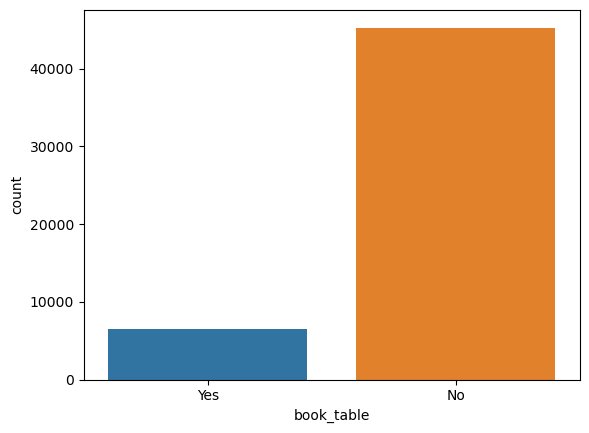

In [12]:
sns.countplot(x='book_table',data = df)

### only 6449 hotel's (12%)  are proving the table booking services

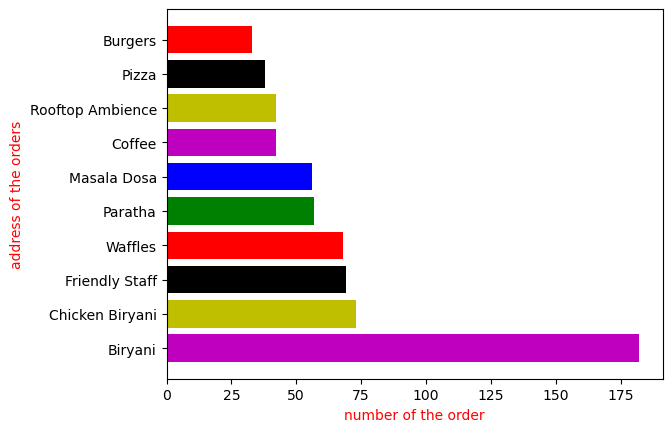

In [13]:
### top 10 most liked dish
import matplotlib.pyplot as plt
y= df["dish_liked"].value_counts().head(10).index
x = df["dish_liked"].value_counts().head(10)
plt.barh(y, x,color=["m","y","k","r","g","b"])
plt.ylabel("address of the orders",color='r')
plt.xlabel("number of the order",color = "r")
plt.show()

### most like dish
1) biryani   2) chiken biryani     3) friendly stuff         4) waffles

### Resturant types

Text(0.5, 1.0, 'Resturant type')

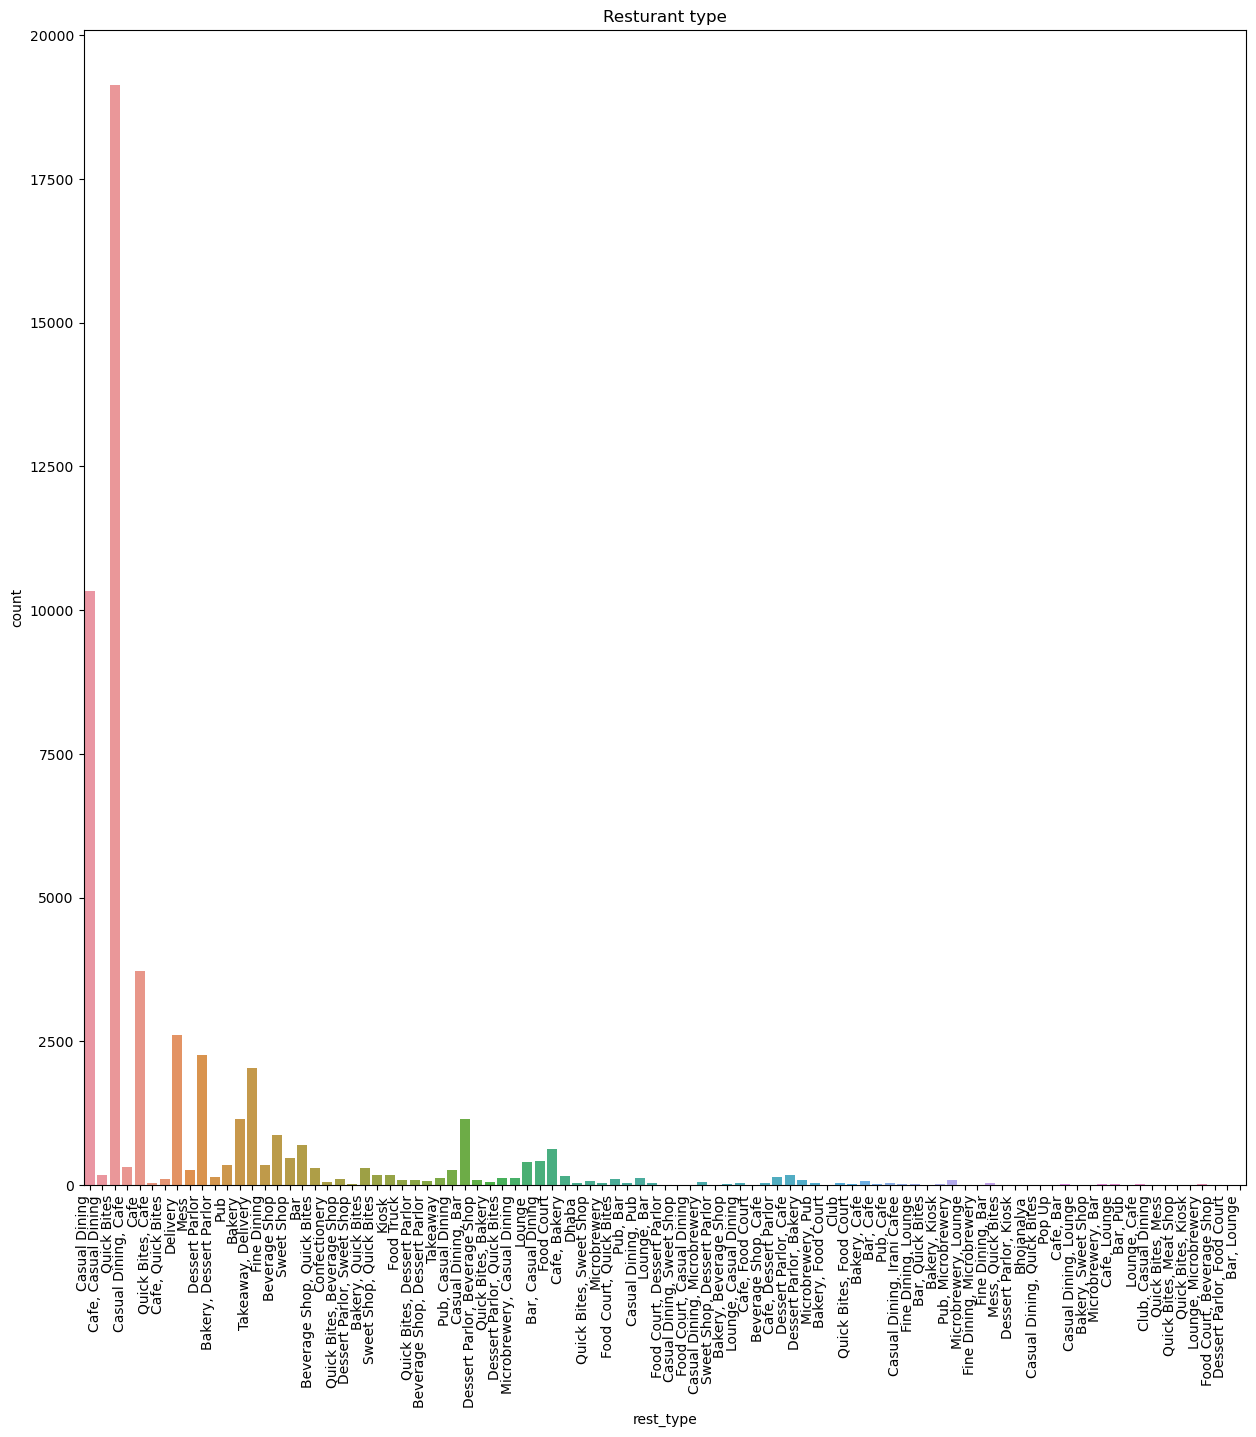

In [14]:
sns.countplot(df['rest_type'])
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Resturant type')

In [15]:
df["rate"] = df["rate"].fillna(0)

##### replacing catergory "NEW" with new_category  = 0

In [16]:
df["rate"] = df["rate"].replace("NEW",0)

In [17]:
df["rate"] = df["rate"].replace("-",0)

In [18]:
for i in range(len(df["rate"])):
    df["rate"][i] = float(str(df["rate"][i]).replace("/5",""))

### missing value handling

#### 1) we have replace nan value in approx_cost(for two people) column with mode of the column

In [19]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].fillna(df["approx_cost(for two people)"].mode()[0])

In [20]:
for i in range(len(df["approx_cost(for two people)"])):
    df["approx_cost(for two people)"][i] = df["approx_cost(for two people)"][i].replace(",","")

#### convert apporox_cost column to int

In [21]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(int)

#### 2) location column has < 5% nan.so we can fill nan value with mode.
#### 3) cuisines column also have <5% nan value so we can also fill with mode.


In [22]:
df["location"] = df["location"].fillna(df["location"].mode()[0])

In [23]:
df["cuisines"] = df["cuisines"].fillna(df["cuisines"].mode()[0])

In [24]:
df.isnull().sum().sort_values(ascending = False)

dish_liked                     28078
phone                           1208
rest_type                        227
url                                0
listed_in(type)                    0
menu_item                          0
reviews_list                       0
approx_cost(for two people)        0
cuisines                           0
location                           0
address                            0
votes                              0
rate                               0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

### which type of reaturant has more approx_cost(for two person)

1) dineout 
2)drinks&nightlife
3) buffet

<Figure size 2000x700 with 0 Axes>

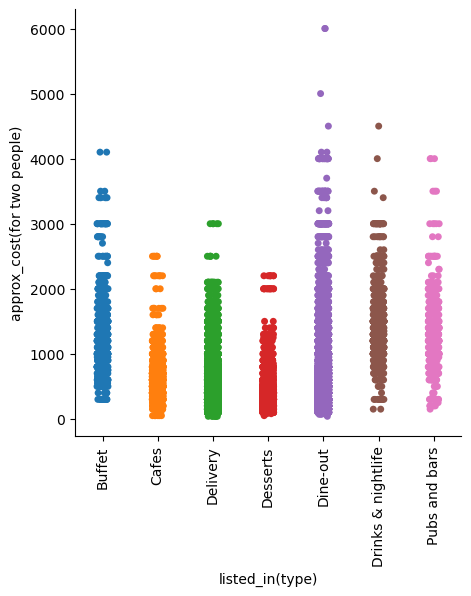

In [25]:
fig = plt.figure(figsize=(20,7))
sns.catplot(x = "listed_in(type)",y = "approx_cost(for two people)",data = df)
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x700 with 0 Axes>

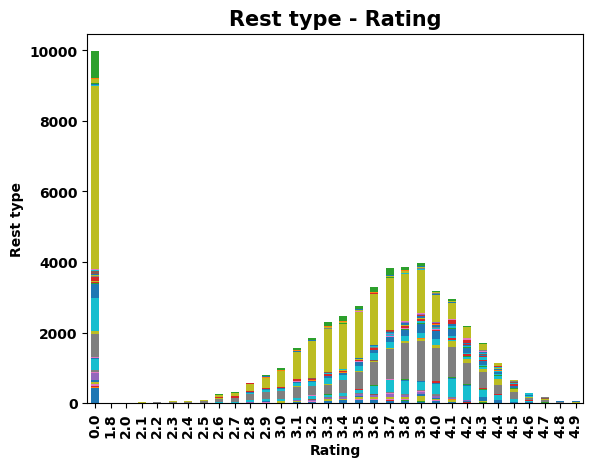

In [26]:
fig = plt.figure(figsize = (20,7))
loc_plt=pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

#### we can see that 0 (missing or not rated ) number are more then other

### most famous hotel

Text(0.5, 0, 'Number of outlets')

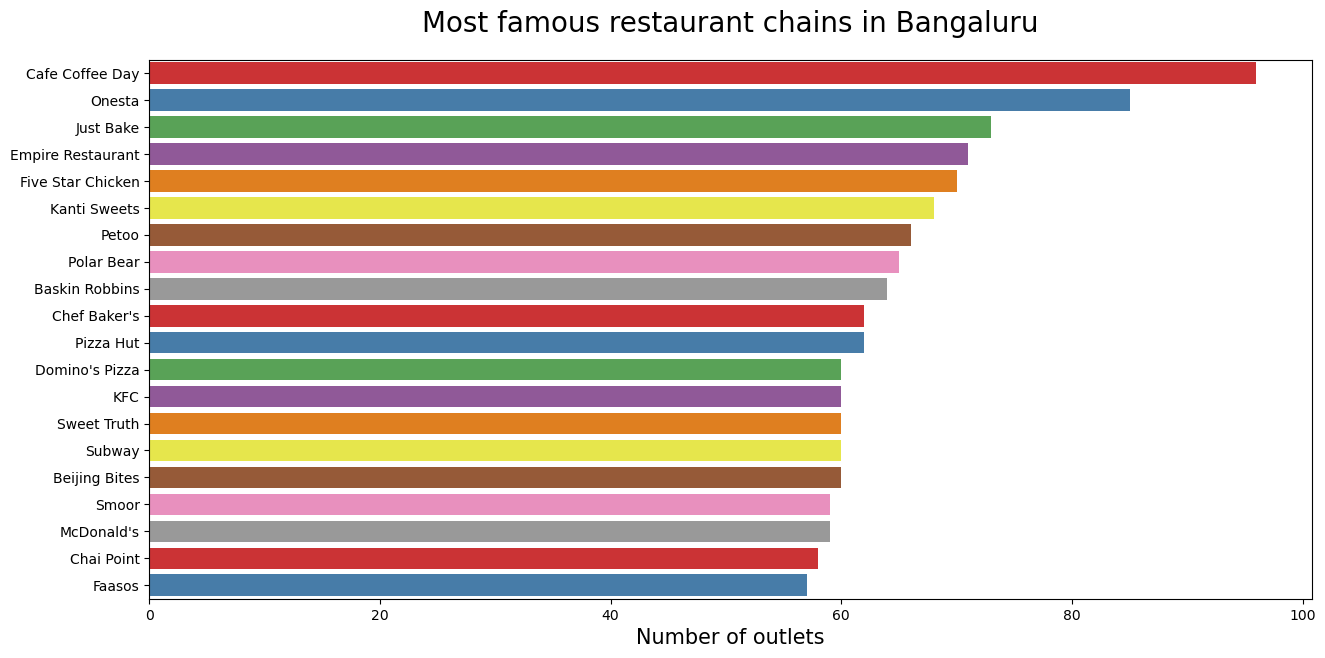

In [27]:
plt.figure(figsize=(15,7))
hotel=df['name'].value_counts()[:20]
sns.barplot(x=hotel,y=hotel.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

#### top 3 famous hotels
##### 1) cafe coffe day        2)onesta             3) justbake

### model training

### removing unnecessary columns

In [28]:
df1 = df.copy()

In [29]:
df1.drop(columns = ["url","address","name","votes","phone","location","dish_liked","cuisines","reviews_list","menu_item"],inplace=True)

In [30]:
mtd = ["k-Nearest Neighbors",
"Decision Trees",
"Naive Bayes",
"Random Forest",
"Gradient Boosting"]

### Encoding of the columns

In [120]:
y = y.astype(float)

In [128]:
le = LabelEncoder()

In [129]:
y = le.fit_transform(y)

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [131]:
trf1 = ColumnTransformer([
    ("encode_value",OneHotEncoder(drop = "first",sparse=False),[0,1,2,4,5])
    ],remainder = "passthrough")

In [132]:
trf2 = StandardScaler()





In [153]:
pipe = Pipeline([("trf1",trf1),
                ("trf2",trf2)
                ])

In [154]:
x1_train = pipe.fit_transform(x_train)
x1_test = pipe.transform(x_test)

array([[ 0.83721862, -0.37623829, -0.01820968, ..., -0.15830181,
        -0.18153976, -0.68936294],
       [ 0.83721862, -0.37623829, -0.01820968, ..., -0.15830181,
        -0.18153976, -0.23522238],
       [-1.19443115, -0.37623829, -0.01820968, ..., -0.15830181,
        -0.18153976, -0.5758278 ],
       ...,
       [-1.19443115, -0.37623829, -0.01820968, ..., -0.15830181,
        -0.18153976, -0.80289807],
       [ 0.83721862, -0.37623829, -0.01820968, ..., -0.15830181,
        -0.18153976, -0.23522238],
       [ 0.83721862, -0.37623829, -0.01820968, ..., -0.15830181,
        -0.18153976, -0.23522238]])

#### selection of the model

In [162]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x1_train, y_train)
y_pred_knn =   knn.predict(x1_test)

In [163]:
accuracy_score(y_test,y_pred_knn)

0.19334880123743234

In [164]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x1_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(x1_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 1.463005929363238
